# Python Assignment

In [1]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

## Functions

### 1. Document Dr. X's function with comments and markdown text.

This function creates a dictionary for all sequences from a provided fasta file. 

In [2]:
def get_sequences_from_file(fasta_fn):  # define a new function called "get_sequences_from_file" with fasta file as an argument
    sequence_data_dict = {}              # create an empty dictionary
    for record in SeqIO.parse(fasta_fn, "fasta"): # for loop using biopython SeqIO which is a input/output interface that looks for ">" which indicates a new record .parse() takes a file name and file format and returns a SeqRecord iterator
        description = record.description.split() # .split() splits characters separated by white space. (for example, all the words in the description)
        species_name = description[1] + " " + description[2] # a species name is created with the genus and species (first and second index of description)
        sequence_data_dict[species_name] = record.seq # add each individual record including it's species name into the created dictionary
    return(sequence_data_dict) # return the dictionary that contains record for each species name and its sequence

### 2. Write a function that translates a string of nucleotides to amino acids based on Dr. X's pseudo-code.

In [3]:
from Bio.Data import CodonTable
mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
print(mito_table)

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

In [4]:
def translate_function1(string_nucleotides): 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] #import codon table from Biopython, unambiguous_dna_by_name extends codon list to include all possible ambigous codons
    aa_seq_string = ""  #create an empty variable "aa_seq_string"

    for i in range(0, len(string_nucleotides), 3):   #for loop to go through the sequence 3 characters at a time and get codon using range subsets
        codon = string_nucleotides[i:i+3] #create variable codon
        if codon != 'TAA' and codon != 'TAG' and codon != 'AGA' and codon!= 'AGG': # IMPORTANT: if the sequence has a stop codon at the end, you should leave it off
            aa = mito_table.forward_table[codon] #create variable aa for amino acid corresponding to codon in mito_table
            aa_seq_string += aa #add aa to aa_seq_string
    return  aa_seq_string #print out aa_seq_string


In [5]:
translate_function1("ATGTAGCCCTTGGAACTTTCCTAG")

'MPLELS'

### 3. Write an alternative translation function.

In [6]:
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC

#code adapted from examples in http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc25

#This function creates a dictionary aa_seq_dict
def translate_function2(sequence_dict): #create a function whose argument is a dictionary of DNA Sequences where key = species and value = dna sequence
    aa_seq_dict = {} #create an empty dictionary to add to
    for key, value in sequence_dict.items(): #for loop that cycles through each key and corresponding value in sequence dictionary
        species_name = key 
        protein = value.translate(to_stop = True) #biopython .translate() function to translate DNA sequence to protein; to_stop = False means translate stop codons; stop codons will be identified with an asterik by default
        aa_seq_dict[species_name] = protein # add each individual record including it's species name into the created dictionary
    return(aa_seq_dict)

#This function simply prints out the string of amino acid sequence
def translate_function3(sequence_dict): #create a function whose argument is a dictionary of DNA Sequences where key = species and value = dna sequence
    for key, value in sequence_dict.items():           #for loop that cycles through each key and corresponding value in sequence dictionary
        species_name = key
        protein = value.translate(to_stop = True) #biopython .translate() function to translate DNA sequence to protein; to_stop = False means translate stop codons; stop codons will be identified with an asterik by default
        print(species_name + " : " + protein + "\n") #print out species name (key), a colon and the protein sequence and start a new line
    

### 4. Write a function that calculates the molecular weight of each amino acid sequence.

In [7]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.Seq import Seq
from Bio import SeqIO
from Bio.Alphabet import IUPAC

#This function creates a dictionary mw_dict
def compute_molecular_weight(sequence_dict): # define a new function whose argument is a dictionary with key=species and value = dna sequence
    mw_dict = {}  #create an empty dictionary to add to
    for key, value in sequence_dict.items(): #for loop that cycles through each key and corresponding value in sequence dictionary
        species_name = key
        protein = value.translate(to_stop = True) #biopython .translate() function to translate DNA sequence to protein
        protein_str = str(protein) # create variable of protein string
        analysed_seq = ProteinAnalysis(protein_str) 
        mw = str(analysed_seq.molecular_weight())
        mw_dict[species_name] = mw #add to new dictionary where key = species_name and value = mw
    return(mw_dict) 

In [8]:
#This function simply prints out the molecular weight
def compute_molecular_weight2(sequence_dict):
    for key, value in sequence_dict.items():
        species_name = key
        protein = value.translate(to_stop = True)
        protein_str = str(protein)
        analysed_seq = ProteinAnalysis(protein_str)
        mw = str(analysed_seq.molecular_weight())
        print (species_name + " : " + mw)

In [9]:
aa_seq_dict = translate_function2(cytb_seqs)

NameError: name 'cytb_seqs' is not defined

### 5. Write a function that computes the GC-content of each DNA sequence.

In [10]:
def GC_content (sequence_dict): # define a function
    for key, value in sequence_dict.items(): #for loop that cycles through each key and corresponding value is a dictionary of DNA Sequences where key = species and value = dna sequence 
        total = len(value) #get a total number of bases in the sequence
        G_count = value.count('G') #get a count of the number of Gs in the sequence
        C_count = value.count('C') #get a count of the number of Cs in the sequence
        GC = ((G_count + C_count)/total)*100  #get a percentage of GC
        print(key + " : " + str(GC))
        
def GC_content2 (sequence_dict):
        gc_dict = {} 
        for key, value in sequence_dict.items(): #for loop that cycles through each key and corresponding value in cytb_seqs
            species_name = key
            total = len(value)
            G_count = value.count('G')
            C_count = value.count('C')
            GC = ((G_count + C_count)/total)*100
            gc_dict[species_name] = GC
        return(gc_dict)

## Main

In [11]:
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") 

bears_df = pd.read_csv("bears_mass.csv") # Includes only data for body mass 
species_list = list(bears_df.species)

In [12]:
cytb_seqs

{'Ursus spelaeus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCTAAAATCATCAACAACTCATTT...AGA', SingleLetterAlphabet()),
 'Ursus arctos': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Ursus thibetanus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCCAAAATCATCAACAACTCACTC...AGA', SingleLetterAlphabet()),
 'Melursus ursinus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTC...AGA', SingleLetterAlphabet()),
 'Ursus americanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Helarctos malayanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Ailuropoda melanoleuca': Seq('ATGATCAACATCCGAAAAACTCATCCATTAGTTAAAATTATCAACAACTCATTC...AGA', SingleLetterAlphabet()),
 'Tremarctos ornatus': Seq('ATGACCAACATCCGAAAAACTCACCCACTAGCTAAAATCATCAACAGCTCATTC...AGA', SingleLetterAlphabet()),
 'Ursus maritimus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCATTT...A

In [13]:
cytb_seqs["Ursus spelaeus"]

Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCTAAAATCATCAACAACTCATTT...AGA', SingleLetterAlphabet())

### 6. Add two new columns to the bears DataFrame: (1) molecular weight and (2) GC content.

In [14]:
import numpy as np
import pandas as pd

#add new columns to dataframe and set them as not a number (NaN)
bears_df["Molecular Weight"] = np.nan
bears_df["GC Content"] = np.nan
print(bears_df)

                  species     mass  Molecular Weight  GC Content
0          Ursus spelaeus  550.800               NaN         NaN
1            Ursus arctos  203.500               NaN         NaN
2        Ursus thibetanus   99.714               NaN         NaN
3        Melursus ursinus  100.030               NaN         NaN
4        Ursus americanus  110.560               NaN         NaN
5     Helarctos malayanus   47.020               NaN         NaN
6  Ailuropoda melanoleuca  118.200               NaN         NaN
7      Tremarctos ornatus  140.700               NaN         NaN
8         Ursus maritimus  425.100               NaN         NaN


### 7. Call your functions from step 3 (or step 2) and step 4 and fill in the new columns in the DataFrame.

In [15]:
mw_dict = compute_molecular_weight(cytb_seqs)
gc_dict = GC_content2(cytb_seqs)

In [16]:
bears_df['Molecular Weight'] = bears_df['species'] #fill in the Molecular Weight column with species name (so we can use .replace() function)
bears_df['GC Content'] = bears_df['species']
bears_df = bears_df.replace({"Molecular Weight": mw_dict}) #use .replace() to replace species with dictionary values
bears_df = bears_df.replace({"GC Content": gc_dict})

### 8. Plot a bar-chart of adult body mass per species. In your description of the graph, provide text that answers these questions: 
 a. What is the largest bear species?  The largest species is Ursus spelaeus
 b. What else is interesting about this species?

[Text(0, 0.5, 'Mass (kg)'), Text(0.5, 0, 'Species ID')]

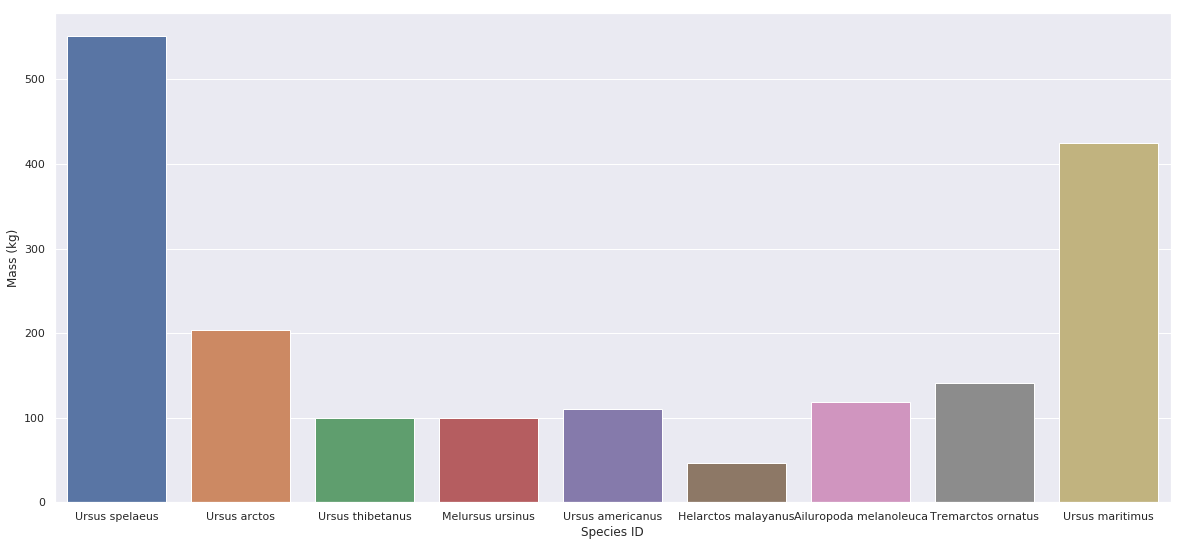

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plot_dims = (20, 9)
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=plot_dims)
sns.barplot(x = 'species', y = 'mass', data=bears_df)
ax.set(xlabel='Species ID', ylabel='Mass (kg)')


### 9. Plot a graph that shows the molecular weight as a function of GC content. 

In [18]:
bears_df1 = bears_df
bears_df1["Molecular Weight"] = pd.to_numeric(bears_df1["Molecular Weight"])
bears_df1["GC Content"] = pd.to_numeric(bears_df1["GC Content"])
bears_df1

,species,mass,Molecular Weight,GC Content
0,Ursus spelaeus,550.800,3207.7007,43.771930
1,Ursus arctos,203.500,3173.6845,43.771930
2,Ursus thibetanus,99.714,3143.6585,45.614035
3,Melursus ursinus,100.030,3143.6585,45.175439
4,Ursus americanus,110.560,3173.6845,43.947368
5,Helarctos malayanus,47.020,3143.6585,44.298246
6,Ailuropoda melanoleuca,118.200,3277.8335,40.789474
7,Tremarctos ornatus,140.700,3180.6754,44.385965
8,Ursus maritimus,425.100,3207.7007,44.298246


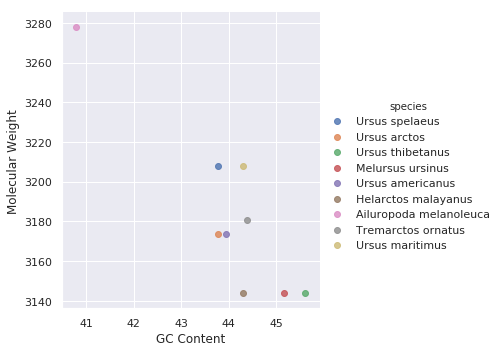

In [19]:
sns.lmplot("GC Content", "Molecular Weight", data= bears_df1, fit_reg=False, hue="species")

### 10. Write the entire DataFrame to a new CSV file that includes your new columns.

In [20]:
import pandas
bears_df1

,species,mass,Molecular Weight,GC Content
0,Ursus spelaeus,550.800,3207.7007,43.771930
1,Ursus arctos,203.500,3173.6845,43.771930
2,Ursus thibetanus,99.714,3143.6585,45.614035
3,Melursus ursinus,100.030,3143.6585,45.175439
4,Ursus americanus,110.560,3173.6845,43.947368
5,Helarctos malayanus,47.020,3143.6585,44.298246
6,Ailuropoda melanoleuca,118.200,3277.8335,40.789474
7,Tremarctos ornatus,140.700,3180.6754,44.385965
8,Ursus maritimus,425.100,3207.7007,44.298246


In [21]:
bears_df1.to_csv("bears_df.csv")

### 11. BONUS: What other visualizations, functions or tasks would you do with this dataset? Add something interesting for fun.

Text(0.5, 0, 'mass kg')

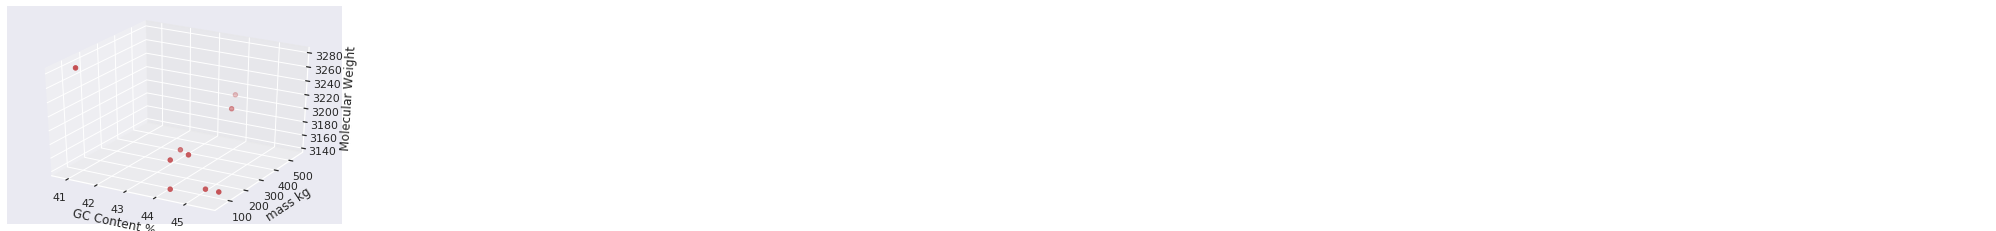

In [22]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
y = bears_df1['mass']
z = bears_df1['Molecular Weight']
x = bears_df1['GC Content']


ax.scatter(x, y, z, c= 'r')
ax.set_xlabel('GC Content %')
ax.set_zlabel('Molecular Weight')
ax.set_ylabel('mass kg')